# HSE 2022: Mathematical Methods for Data Analysis

## Homework 2

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we use Dataset from seaborn on diamonds prices.

In [189]:
data = sns.load_dataset('diamonds')

y = data.price
X = data.drop(['price'], axis=1)
columns = data.drop(['price'], axis=1).columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## Linear regression

#### 0. [0.25 points] Encode categorical variables.

In [190]:
encoder = LabelEncoder()
categorical = list(X.dtypes[X.dtypes == "category"].index)
X[categorical] = X[categorical].fillna("NotGiven")
X[categorical] = X[categorical].fillna("NotGiven")
X['cut'] = encoder.fit_transform(X.cut)
X['color'] = encoder.fit_transform(X.color)
X['clarity'] = encoder.fit_transform(X.clarity)
X.head()
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


#### 1. [0.25 points] Split the data into train and test sets with ratio 80:20 with random_state=17.

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

#### 2. [1 point] Train models on train data using StatsModels library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.6$

Don't forget to scale the data before training the models with StandardScaler!

In [192]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [193]:
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)
model = sm.OLS(y_train, X_train_scaled)
results = model.fit()
y_pred_linear = results.predict(X_test_scaled)
y_train_pred_linear = results.predict(X_train_scaled)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred_linear, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_linear, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred_linear))
print("Test R2 = %.4f" % r2_score(y_test, y_pred_linear))
OLSResults(model, results.params, model.normalized_cov_params).summary2()

Train RMSE = 1347.9933
Test RMSE = 1370.5909
Train R2 = 0.8853
Test R2 = 0.8840


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.885      
Dependent Variable: price            AIC:                744418.8263
Date:               2022-10-16 20:26 BIC:                744505.5512
No. Observations:   43152            Log-Likelihood:     -3.7220e+05
Df Model:           9                F-statistic:        3.701e+04  
Df Residuals:       43142            Prob (F-statistic): 0.00       
R-squared:          0.885            Scale:              1.8175e+06 
---------------------------------------------------------------------
         Coef.     Std.Err.     t      P>|t|     [0.025      0.975]  
---------------------------------------------------------------------
const   3928.6813    6.4899  605.3537  0.0000   3915.9610   3941.4016
x1      5257.1453   31.0710  169.1979  0.0000   5196.2456   5318.0450
x2        76.4610    6.6590   11.4824  0.0000     63.4093     89.5128
x3      -455.4350    6.8100  -66.8778  0.0000   -468.7826   -442.0874
x4       491.4240    6.7022   73.3231  0.0000    478.2876    504.5604
x5      -226.2704    7.9533  -28.4498  0.0000   -241.8590   -210.6818
x6      -213.2612    6.9923  -30.4996  0.0000   -226.9662   -199.5562
x7     -1383.2878   48.3537  -28.6077  0.0000  -1478.0619  -1288.5137
x8        42.1665   29.5137    1.4287  0.1531    -15.6809    100.0138
x9         3.3540   29.6459    0.1131  0.9099    -54.7524     61.4604
--------------------------------------------------------------------
Omnibus:            11265.146      Durbin-Watson:         1.999     
Prob(Omnibus):      0.000          Jarque-Bera (JB):      360275.892
Skew:               0.611          Prob(JB):              0.000     
Kurtosis:           17.103         Condition No.:         18        
====================================================================

"""

In [194]:
from statsmodels.tools.tools import pinv_extended

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)
model = sm.OLS(y_train, X_train_scaled)
results = model.fit_regularized(L1_wt=0, alpha=0.01)
y_pred_ridge = results.predict(X_test_scaled)
y_train_pred_ridge = results.predict(X_train_scaled)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred_ridge, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_ridge, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred_ridge))
print("Test R2 = %.4f" % r2_score(y_test, y_pred_ridge))
pinv_wexog, _ = pinv_extended(model.wexog)
normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
OLSResults(model, results.params, normalized_cov_params).summary()

Train RMSE = 1365.9920
Test RMSE = 1380.9027
Train R2 = 0.8822
Test R2 = 0.8822


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 3.591e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:26:14   Log-Likelihood:            -3.7277e+05
No. Observations:               43152   AIC:                         7.456e+05
Df Residuals:                   43142   BIC:                         7.457e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3889.7835      6.577    591.463      0.000    3876.893    3902.674
x1          4219.7372     31.486    134.020      0.000    4158.024    4281.450
x2            81.8556      6.748     12.131      0.000      68.630      95.082
x3          -424.7483      6.901    -61.550      0.000    -438.274    -411.222
x4           496.6610      6.792     73.128      0.000     483.349     509.973
x5          -162.6547      8.060    -20.182      0.000    -178.451    -146.858
x6          -203.6562      7.086    -28.742      0.000    -217.544    -189.768
x7          -312.9137     48.999     -6.386      0.000    -408.953    -216.874
x8            21.4162     29.908      0.716      0.474     -37.204      80.036
x9           -39.9802     30.042     -1.331      0.183     -98.862      18.902
==============================================================================
Omnibus:                    13066.102   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           183804.270
Skew:                           1.067   Prob(JB):                         0.00
Kurtosis:                      12.883   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)
model = sm.OLS(y_train, X_train_scaled)
results = model.fit_regularized(L1_wt=1, alpha=0.01)

y_pred_lasso = results.predict(X_test_scaled)
y_train_pred_lasso = results.predict(X_train_scaled)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred_lasso, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_lasso, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred_lasso))
print("Test R2 = %.4f" % r2_score(y_test, y_pred_lasso))
pinv_wexog, _ = pinv_extended(model.wexog)
normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
OLSResults(model, results.params, normalized_cov_params).summary2()

Train RMSE = 1348.6037
Test RMSE = 1369.1877
Train R2 = 0.8852
Test R2 = 0.8842


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.885      
Dependent Variable: price            AIC:                744457.9003
Date:               2022-10-16 20:26 BIC:                744544.6252
No. Observations:   43152            Log-Likelihood:     -3.7222e+05
Df Model:           9                F-statistic:        3.697e+04  
Df Residuals:       43142            Prob (F-statistic): 0.00       
R-squared:          0.885            Scale:              1.8192e+06 
---------------------------------------------------------------------
         Coef.     Std.Err.     t      P>|t|     [0.025      0.975]  
---------------------------------------------------------------------
const   3928.6713    6.4928  605.0782  0.0000   3915.9452   3941.3974
x1      5063.8698   31.0850  162.9037  0.0000   5002.9425   5124.7970
x2        77.5642    6.6620   11.6428  0.0000     64.5066     90.6218
x3      -453.1266    6.8130  -66.5087  0.0000   -466.4802   -439.7729
x4       495.2762    6.7052   73.8644  0.0000    482.1339    508.4186
x5      -214.9442    7.9569  -27.0135  0.0000   -230.5399   -199.3485
x6      -213.4343    6.9954  -30.5105  0.0000   -227.1455   -199.7231
x7     -1201.4586   48.3756  -24.8361  0.0000  -1296.2757  -1106.6416
x8        54.7441   29.5270    1.8540  0.0637     -3.1294    112.6176
x9        -1.4625   29.6593   -0.0493  0.9607    -59.5953     56.6702
--------------------------------------------------------------------
Omnibus:            11656.263      Durbin-Watson:         1.999     
Prob(Omnibus):      0.000          Jarque-Bera (JB):      315053.588
Skew:               0.713          Prob(JB):              0.000     
Kurtosis:           16.160         Condition No.:         18        
====================================================================

"""

In [196]:
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)
model = sm.OLS(y_train, X_train_scaled)
results = model.fit_regularized(L1_wt = 0.6,alpha=0.01)
y_pred_elastic = results.predict(X_test_scaled)
y_train_pred_elastic = results.predict(X_train_scaled)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred_elastic, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_elastic, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred_elastic))
print("Test R2 = %.4f" % r2_score(y_test, y_pred_elastic))
pinv_wexog, _ = pinv_extended(model.wexog)
normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
OLSResults(model, results.params, normalized_cov_params).summary2()

Train RMSE = 1353.6044
Test RMSE = 1370.9586
Train R2 = 0.8844
Test R2 = 0.8839


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.884      
Dependent Variable: price            AIC:                744777.3304
Date:               2022-10-16 20:26 BIC:                744864.0552
No. Observations:   43152            Log-Likelihood:     -3.7238e+05
Df Model:           9                F-statistic:        3.666e+04  
Df Residuals:       43142            Prob (F-statistic): 0.00       
R-squared:          0.884            Scale:              1.8327e+06 
---------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025     0.975] 
---------------------------------------------------------------------
const     3913.0232    6.5169  600.4416  0.0000  3900.2499  3925.7965
x1        4675.8946   31.2003  149.8669  0.0000  4614.7414  4737.0478
x2          79.7319    6.6867   11.9240  0.0000    66.6258    92.8379
x3        -440.5288    6.8383  -64.4208  0.0000  -453.9320  -427.1256
x4         496.4432    6.7301   73.7649  0.0000   483.2521   509.6342
x5        -190.1759    7.9864  -23.8124  0.0000  -205.8294  -174.5223
x6        -209.3948    7.0214  -29.8225  0.0000  -223.1568  -195.6328
x7        -766.0692   48.5550  -15.7774  0.0000  -861.2378  -670.9005
x8          20.1115   29.6365    0.6786  0.4974   -37.9767    78.1996
x9         -26.8075   29.7693   -0.9005  0.3679   -85.1558    31.5408
--------------------------------------------------------------------
Omnibus:            12406.161      Durbin-Watson:         1.999     
Prob(Omnibus):      0.000          Jarque-Bera (JB):      244618.648
Skew:               0.894          Prob(JB):              0.000     
Kurtosis:           14.526         Condition No.:         18        
====================================================================

"""

#### 3. [1 point] Explore the values of the parameters of the resulting models and compare the number of zero weights in them. Comment on the significance of the coefficients, overal model significance and other related factors from the results table

1) В каждой обученной модели два незначимых коэффициента - x8 и x9.
У данных коэффициентов p-value > 0.05, следовательно, гипотеза о незначимости
данных коэффициентов не может быть отвергнута.
2) Также в доверительных интервалах коэффициентов x8 и x9 во всех моделях содержится 0,
что также говорит о незначимости данных коэффициентов.
3) Также в каждой модели значение Prob(F-statistic) равно нулю. Это означает,
что вероятность того, что все коэффициенты в моделях одновременно равны 0,
равна 0, следовательно, все обученные модели являются значимыми.
4) AIC - параметр, который показывает, насколько сильно переобучена модель.
Чем меньше данный параметр, тем лучше модель. По такому критерию, среди обученных
моделей лучшей является обычная линейная регрессия.
5) По параметру BIC (то же самое, что AIC, только штрафует за ненужные параметры)
также лучшей является линейная регрессия.
6) В соответствии с параметром R-squared (чем он ближе к единице, тем точнее модель)
наименее точной является модель Ridge.

#### 4. [1 point] Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions.

In [197]:
features = list(X_train.columns)
while len(features) > 0:
    X_train_model = X_train[features]
    X_train_model = scaler.fit_transform(X_train_model)
    X_train_model = sm.add_constant(X_train_model)
    model = sm.OLS(y_train, X_train_model)
    results = model.fit()
    p_values = results.pvalues
    max_p_value = np.max(p_values)
    max_index = np.argmax(p_values)
    if max_p_value > 0.05:
        features.remove(X_train.columns[max_index - 1])
    else:
        break
print('Significant features: ', features)
results.summary2()
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Significant features:  ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x']


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.885      
Dependent Variable: price            AIC:                744416.9518
Date:               2022-10-16 20:26 BIC:                744486.3317
No. Observations:   43152            Log-Likelihood:     -3.7220e+05
Df Model:           7                F-statistic:        4.758e+04  
Df Residuals:       43144            Prob (F-statistic): 0.00       
R-squared:          0.885            Scale:              1.8175e+06 
---------------------------------------------------------------------
         Coef.     Std.Err.     t      P>|t|     [0.025      0.975]  
---------------------------------------------------------------------
const   3928.6813    6.4899  605.3528  0.0000   3915.9610   3941.4016
x1      5259.0042   31.0446  169.4016  0.0000   5198.1562   5319.8522
x2        76.7155    6.6560   11.5258  0.0000     63.6697     89.7613
x3      -455.4584    6.8099  -66.8820  0.0000   -468.8059   -442.1109
x4       491.4681    6.7020   73.3318  0.0000    478.3321    504.6041
x5      -226.2530    7.1239  -31.7598  0.0000   -240.2159   -212.2900
x6      -213.6785    6.9857  -30.5879  0.0000   -227.3706   -199.9864
x7     -1340.6484   30.9523  -43.3134  0.0000  -1401.3155  -1279.9813
--------------------------------------------------------------------
Omnibus:            11265.398      Durbin-Watson:         1.999     
Prob(Omnibus):      0.000          Jarque-Bera (JB):      360683.897
Skew:               0.610          Prob(JB):              0.000     
Kurtosis:           17.111         Condition No.:         10        
====================================================================

"""

Выводы:
1) Незначимыми являются параметры y и z.
2) Значение F-статистики после elimination стало больше, следовательно,
модель линейной регрессии после elimination стала значимее.

#### 5. [1 point] Find the best (in terms of RMSE) $\alpha$ for Lasso regression using cross-validation with 4 folds. You must select values from range $[10^{-4}, 10^{3}]$.

In [198]:
lasso = Lasso(alpha=0.01)
alphas = np.logspace(-4, 3)
model = GridSearchCV(lasso, {'alpha':alphas}, scoring='neg_mean_squared_error', cv=4)
model.fit(X_train_scaled, y_train)
print('Best alpha - ', model.best_params_['alpha'])
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Best alpha -  2.682695795279722


## Gradient descent

#### 6. [3.5 points] Implement a Ridge regression model for the MSE loss function, trained by gradient descent.

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Absolute-value norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the batch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$



To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a random vector from normal distribution. The following is a template class that needs to contain the code implementing all variations of the models.


In [199]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=0.4, gd_type='Momentum',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3, epsilon = 1e-8, reg_cf = 1e-2 ):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """
        self.epsilon = epsilon
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.reg_cf = reg_cf
        self.loss_history = None # list of loss function values at each training iteration

    def full_gradient_descent(self, X, y):
        iterations = 0
        self.w = self.w0.copy()
        w_prev = self.w0.copy()
        while iterations < self.max_iter and (np.linalg.norm(self.w - w_prev) - self.tolerance >= 0 or iterations == 0):
            iterations += 1
            w_prev = self.w.copy()
            gradient = self.calc_gradient(X, y)
            self.w -= self.eta * gradient
            self.loss_history.append(self.calc_loss(X, y))

    def stochastic_gradient_descent(self, X, y):
        iterations = 0
        self.w = self.w0.copy()
        w_prev = self.w0.copy()
        batch_size = int(self.delta * X.shape[0])
        while iterations < self.max_iter and (np.linalg.norm(self.w - w_prev) - self.tolerance >= 0 or iterations == 0):
            sample = np.random.randint(y.shape[0], size=batch_size)
            iterations += 1
            w_prev = self.w
            f = X[sample, :].dot(self.w)
            error = f - y.iloc[sample]
            gradient = (2 * X[sample, :].T.dot(error) + 2 * self.reg_cf * self.w) / batch_size
            self.w -= self.eta * gradient
            self.loss_history.append(self.calc_loss(X, y))

    def momentum(self, X, y):
        iterations = 0
        self.w = self.w0.copy()
        w_prev = self.w0.copy()
        h = np.zeros(self.w.shape[0])
        while iterations < self.max_iter and (np.linalg.norm(self.w - w_prev) - self.tolerance >= 0 or iterations == 0):
            iterations += 1
            w_prev = self.w
            gradient = self.calc_gradient(X, y)
            h = self.alpha * h + self.eta * gradient
            self.w = self.w - h
            self.loss_history.append(self.calc_loss(X, y))


    def adagrad(self, X, y):
        iterations = 0
        self.w = self.w0.copy()
        w_prev = self.w0.copy()
        G = np.zeros(self.w.shape[0])
        while iterations < self.max_iter and (np.linalg.norm(self.w - w_prev) - self.tolerance >= 0 or iterations == 0):
            iterations += 1
            w_prev = self.w
            gradient = self.calc_gradient(X, y)
            G += np.square(gradient)
            self.w = self.w - (self.eta / np.sqrt(G + self.epsilon) * gradient)
            self.loss_history.append(self.calc_loss(X, y))

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        self.w0 = np.random.normal(0, 1, X.shape[1])
        if self.gd_type == 'GradientDescent':
            self.full_gradient_descent(X, y)
        if self.gd_type == 'StochasticDescent':
            self.stochastic_gradient_descent(X, y)
        if self.gd_type == 'Momentum':
            self.momentum(X, y)
        if self.gd_type == 'Adagrad':
            self.adagrad(X, y)
        return self


    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return X.dot(self.w)
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        f = X.dot(self.w)
        error = f - y
        gradient = (2 * X.T.dot(error) + 2 * self.reg_cf * self.w) / y.shape[0]
        return gradient

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """
        return ((X.dot(self.w) - y).T.dot(X.dot(self.w) - y) +
                self.reg_cf * np.sum(pow(self.w, 2)))/X.shape[0]
        pass

#### 7. [1 points] Train and validate "hand-written" models on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

In [200]:
linreg = LinReg()
linreg.fit(X_train_scaled, y_train)
momentum_loss_history = linreg.loss_history
y_pred = linreg.predict(X_train_scaled)
y_test_pred = linreg.predict(X_test_scaled)
print('Momentum')
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_pred))
print("Test R2 = %.4f" % r2_score(y_test, y_test_pred))
print('Predicted coefficients')
print(linreg.w)

Momentum
Train RMSE = 1418.1162
Test RMSE = 1433.9168
Train R2 = 0.8731
Test R2 = 0.8730
Predicted coefficients
[3928.68037249 3152.61212376   87.40254009 -405.72489451  516.52011589
 -116.43465276 -198.72674328  517.30420985  148.40041029   69.40691828]


In [201]:
linreg = LinReg(gd_type='GradientDescent')
linreg.fit(X_train_scaled, y_train)
gradient_descent_loss_history = linreg.loss_history
y_pred = linreg.predict(X_train_scaled)
y_test_pred = linreg.predict(X_test_scaled)
print('Gradient descent')
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_pred))
print("Test R2 = %.4f" % r2_score(y_test, y_test_pred))
print('Predicted coefficients')
print(linreg.w)
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Gradient descent
Train RMSE = 1418.1781
Test RMSE = 1433.9839
Train R2 = 0.8731
Test R2 = 0.8730
Predicted coefficients
[3928.68037235 3151.68454825   87.39894107 -405.69622458  516.52406867
 -116.41033836 -198.70210263  516.6502787   149.66320111   69.72192029]


In [202]:
linreg = LinReg(gd_type='StochasticDescent', tolerance=1e-100000)
linreg.fit(X_train_scaled, y_train)
stochastic_descent_loss_history = linreg.loss_history
y_pred = linreg.predict(X_train_scaled)
y_test_pred = linreg.predict(X_test_scaled)
print('Stochastic descent')
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_pred))
print("Test R2 = %.4f" % r2_score(y_test, y_test_pred))
print('Predicted coefficients')
print(linreg.w)

Stochastic descent
Train RMSE = 1418.3055
Test RMSE = 1434.1346
Train R2 = 0.8731
Test R2 = 0.8730
Predicted coefficients
[3929.14168009 3150.87678481   86.80801541 -405.95012177  516.10419625
 -116.09678976 -198.74264534  516.68709841  156.13231985   68.21774649]


In [203]:
grid_search = GridSearchCV(LinReg(gd_type='Adagrad'), {'eta' : np.logspace(2, 4)},
                           cv = 4, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_eta = grid_search.best_params_
print('Best eta for adagrad - ', best_eta)

Best eta for adagrad -  {'eta': 1526.4179671752333}


In [205]:
linreg = LinReg(gd_type='Adagrad', eta=1526.4179671752333)
linreg.fit(X_train_scaled, y_train)
adagrad_loss_history = linreg.loss_history
y_pred = linreg.predict(X_train_scaled)
y_test_pred = linreg.predict(X_test_scaled)
print('Adagrad')
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_pred))
print("Test R2 = %.4f" % r2_score(y_test, y_test_pred))
print('Predicted coefficients')
print(linreg.w)

Adagrad
Train RMSE = 1348.0143
Test RMSE = 1370.3796
Train R2 = 0.8853
Test R2 = 0.8840
Predicted coefficients
[ 3928.68037897  5234.21544414    76.76673304  -455.07401451
   491.87031492  -223.04800188  -213.47208723 -1327.31764988
    25.82704136   -13.98538358]


In [206]:
model = Ridge(alpha=0.01)
model.fit(X_train_scaled, y_train)
y_pred_ridge = model.predict(X_test_scaled)
y_train_pred_ridge = model.predict(X_train_scaled)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred_ridge, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_ridge, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred_ridge))
print("Test R2 = %.4f" % r2_score(y_test, y_pred_ridge))

Train RMSE = 1347.9933
Test RMSE = 1370.5905
Train R2 = 0.8853
Test R2 = 0.8840


Выводы:
1) При tolerance, равном 1e-4, алгоритм стохастического градиентного спуска очень
быстро заканчивается, так как выход из цикла происходит после одной итерации. Качество
обучения при этом низкое, поэтому можно уменьшить параметр tolerance и сделать его,
например, 1e-10. В этом случае качество модели становится лучше.
2) При eta = 0.01 и обучении алгоритмом adagrad функция ошибки убывает очень медленно
в силу деления eta на каждой итерации. Эту проблему удалось решить, увеличив learning
rate. Как и ожидалось, качество модели стало намного лучше.
3) Также при увеличении max_iter качество модели улучшается, однако алгоритм дольше работает.
4) Наиболее точной моделью, судя по параметру R^2, является модель Ridge из sklearn,
ее R^2 ближе всех к единице. (При дефолтных параметрах)
5) По параметрам RMSE также лучшей является модель Ridge из sklearn, у нее наименьшее RMSE.
6) При дефолтных параметрах R^2 для модели, обученной алгоритмами adagrad и stochastic
gradient descent, отрицательный, именно поэтому необходимы изменения параметров, описанные
в пунктах 1 и 2.

#### 8. [1 points] Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD, Momentum and Adagrad. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

Text(0, 0.5, 'Loss function value')

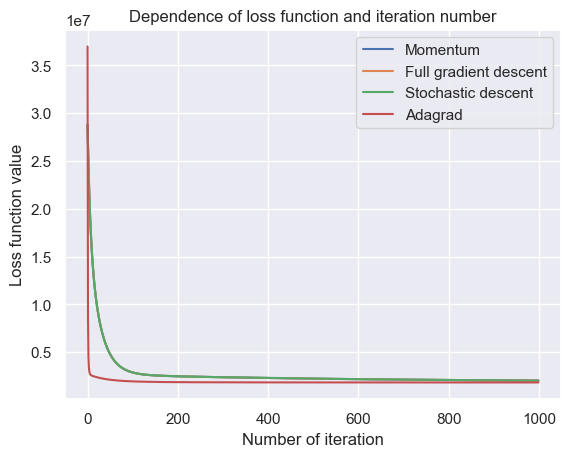

In [207]:
count = len(momentum_loss_history)
list_of_indexes = np.arange(count)
plt.plot(list_of_indexes, momentum_loss_history)
count = len(gradient_descent_loss_history)
list_of_indexes = np.arange(count)
plt.plot(list_of_indexes, gradient_descent_loss_history)
count = len(stochastic_descent_loss_history)
list_of_indexes = np.arange(count)
plt.plot(list_of_indexes, stochastic_descent_loss_history)
count = len(adagrad_loss_history)
list_of_indexes = np.arange(count)
plt.plot(list_of_indexes, adagrad_loss_history)
plt.title('Dependence of loss function and iteration number')
plt.legend(['Momentum', 'Full gradient descent', 'Stochastic descent', 'Adagrad'])
plt.xlabel('Number of iteration')
plt.ylabel('Loss function value')
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

1) С каждой новой итерацией значение функции потерь для моделей, обученных
методами полного, стохастического градиентного спуска и методом momentum, при
learning rate = 0.01 становится меньше. График зависимости довольно быстро убывает.
Менее чем за 100 итераций значение функции потерь сильно падает. По графику явно заметно,
что значения функции сходятся к какому-то минимуму.
2) В отличие от других графиков, график зависимости значения функции потерь от номера
итерации для модели, обученной методом adagrad при заданном learning rate = 0.01 убывает очень медленно,
и за большое количество итераций не сходится к конкретному значению минимума. Поэтому было принято решение
увеличить learning rate, а для поиска наиболее оптимального learning rate была использована
кросс-валидация. Благодаря этому, график зависимости значения функции ошибки от номера итерации убывает
быстрее всех. Значения функции при этом сходятся примерно к тому же минимуму, что и значения функции при
других методах обучения.
